## Exploração de dados consolidados das métricas

O objetivo desse notebook é explorar o comportamento das métricas coletadas de cpu e memória de uma aplicação típica

In [1]:
import pandas as pd
import numpy as np
import hashlib
import glob

In [2]:
path_projeto = '/home/56740050368/Treinamento/IA-PUC_Minas/Trabalho_Cientifico'
path_processados = '/dados/metrics/cpu/processados/'

header_list = ['hash', 'hora', 'minuto', 'consumo_cpu']

df_cpu = pd.read_csv(f'{path_projeto}{path_processados}consolidado_cpu.csv', skiprows = 1, header=None, names=header_list)

df_cpu = df_cpu[df_cpu['consumo_cpu'] > 0.001]

df_cpu.head()

,hash,hora,minuto,consumo_cpu
1,0dcf61756612a9edfc06d254802e4b28,12,0,0.001025
6,6ea197bec278345eb050a1c3afd023b2,12,0,0.005398
7,e718d2154c7f59c5526938d772d6193a,12,0,0.008081
8,62eaefb7f62ea7efcae0032d167dd9b4,12,0,0.005347
9,e4bb80ff171229f80352e22ad8850418,12,0,0.009828


In [3]:
# Filtrando uma aplicação típica
hash_app = 'e718d2154c7f59c5526938d772d6193a'
app1 = df_cpu[df_cpu['hash']==hash_app].sort_values(['hora','minuto'])
app1

,hash,hora,minuto,consumo_cpu
476537,e718d2154c7f59c5526938d772d6193a,0,0,0.007422
453312,e718d2154c7f59c5526938d772d6193a,0,15,0.007923
11646,e718d2154c7f59c5526938d772d6193a,0,30,0.007784
209336,e718d2154c7f59c5526938d772d6193a,0,45,0.005791
581113,e718d2154c7f59c5526938d772d6193a,1,0,0.007713
...,...,...,...,...
1022876,e718d2154c7f59c5526938d772d6193a,22,45,0.008073
34896,e718d2154c7f59c5526938d772d6193a,23,0,0.007545
976329,e718d2154c7f59c5526938d772d6193a,23,15,0.008019
929816,e718d2154c7f59c5526938d772d6193a,23,30,0.007390


In [4]:
# app1.plot(x ='Hora', y='CPU', kind = 'line')
# Calculo dos minutos
app1['minutos'] = app1['hora'] * 60 + app1['minuto']
app1

,hash,hora,minuto,consumo_cpu,minutos
476537,e718d2154c7f59c5526938d772d6193a,0,0,0.007422,0
453312,e718d2154c7f59c5526938d772d6193a,0,15,0.007923,15
11646,e718d2154c7f59c5526938d772d6193a,0,30,0.007784,30
209336,e718d2154c7f59c5526938d772d6193a,0,45,0.005791,45
581113,e718d2154c7f59c5526938d772d6193a,1,0,0.007713,60
...,...,...,...,...,...
1022876,e718d2154c7f59c5526938d772d6193a,22,45,0.008073,1365
34896,e718d2154c7f59c5526938d772d6193a,23,0,0.007545,1380
976329,e718d2154c7f59c5526938d772d6193a,23,15,0.008019,1395
929816,e718d2154c7f59c5526938d772d6193a,23,30,0.007390,1410


In [5]:
# Selecão das colunas
app_selected = app1[['minutos', 'consumo_cpu']]

# Transforma o consumo de cpu em mCPU (*1000)
app_selected['consumo_cpu'] = app_selected['consumo_cpu'].apply(lambda x: x * 1000)


/tmp/ipykernel_4789/1801243153.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app_selected['consumo_cpu'] = app_selected['consumo_cpu'].apply(lambda x: x * 1000)


<AxesSubplot:xlabel='minutos', ylabel='mCPU'>

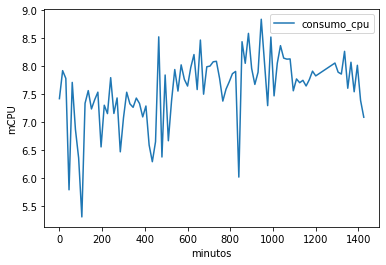

In [6]:
app_selected.plot(x ='minutos', y='consumo_cpu', kind = 'line', ylabel='mCPU')

In [7]:
# Medições de memoria
path_memoria_processados = '/dados/metrics/memoria/processados/'

header_list = ['hash', 'hora', 'minuto', 'consumo_memoria']

df_memoria = pd.read_csv(f'{path_projeto}{path_memoria_processados}consolidado_memoria.csv', skiprows = 1, header=None, names=header_list)

df_memoria

,hash,hora,minuto,consumo_memoria
0,ce4468ee8389709c20b40ed1c09a36c1,7,30,1708949504
1,0dcf61756612a9edfc06d254802e4b28,7,30,1890074624
2,19d9963e0460ed384a60ef724eb79ba0,7,30,1742049280
3,71fda736ff39dfe174e01df9d489ee11,7,30,972959744
4,1e300feefc2f05d7e69bbae4dd0a7bda,7,30,2026012672
...,...,...,...,...
1062831,549e6de29086031460e6dc2b5b5a23b2,0,30,319078400
1062832,923e73720e11ced1e0278319563d4002,0,30,318382080
1062833,3d72b13248e9c2655339a30d6cac122c,0,30,295120896
1062834,71616988da26ec9cb9d4c031498c9379,0,30,266706944


In [10]:
# Filtrando uma aplicação
df_memoria['minutos'] = df_memoria['hora'] * 60 + df_memoria['minuto']
app1_mm = df_memoria[df_memoria['hash']==hash_app].sort_values('hora')
app1_mm = app1_mm[['minutos', 'consumo_memoria']]

# Converte tamanho de memória de bytes para MB
app1_mm['consumo_memoria'] = app1_mm['consumo_memoria'] / (1024 * 1024)
app1_mm = app1_mm.sort_values(by=['minutos'])
app1_mm

,minutos,consumo_memoria
572264,0,58.769531
432067,15,58.562500
1051185,30,58.699219
537235,45,57.882812
829220,60,59.574219
...,...,...
280251,1365,58.378906
478827,1380,58.535156
934381,1395,58.261719
1027863,1410,58.878906


<AxesSubplot:xlabel='minutos', ylabel='MB'>

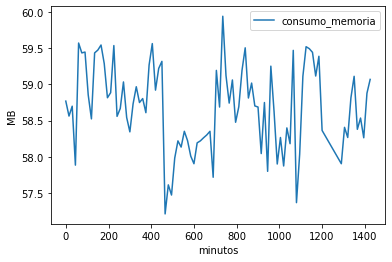

In [11]:
app1_mm.plot(x ='minutos', y='consumo_memoria', kind = 'line', ylabel='MB')